In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
#from scipy.special import boxcox1p
#from scipy.stats import boxcox_normmax
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import random
from sklearn.decomposition import PCA

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import optuna

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
shill = pd.read_csv('Shill_Bidding_Dataset.csv')

In [3]:
shill[shill.duplicated()].shape

(0, 13)

So, there is no duplicate data in the dataframe

In [4]:
shill.head(20)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


In [5]:
shill.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [6]:
shill.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [7]:
shill.isna().any()

Record_ID                 False
Auction_ID                False
Bidder_ID                 False
Bidder_Tendency           False
Bidding_Ratio             False
Successive_Outbidding     False
Last_Bidding              False
Auction_Bids              False
Starting_Price_Average    False
Early_Bidding             False
Winning_Ratio             False
Auction_Duration          False
Class                     False
dtype: bool

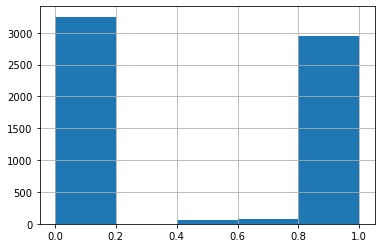

In [8]:
shill['Starting_Price_Average'].hist(bins=5)

In [9]:
shill3 = shill.copy().drop(columns = ['Auction_ID','Bidder_ID','Record_ID']) 
shill3.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [73]:
fraud_cases = shill[shill["Class"] == 1]
valid_cases = shill[shill["Class"] == 0]

Outlier_fraction=len(fraud_cases)/float(len(valid_cases))
print(Outlier_fraction)
print("fraud cases {}".format(len(fraud_cases)))
print("Valid cases {}".format(len(valid_cases)))

0.11955366631243358
fraud cases 675
fraud cases 5646


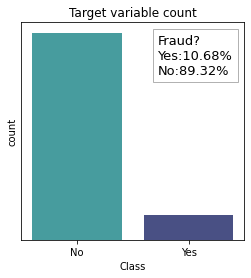

In [10]:
perc_1 = len(shill[shill['Class']==1])/len(shill)
perc_0 = len(shill[shill['Class']==0])/len(shill)

labels=['No','Yes']

plt.figure(figsize=(4,4))
ax = sns.countplot(x='Class', data=shill, palette='mako_r')
#ax.bar_label(ax.containers[0])
plt.title('Target variable count')
plt.yticks([])
plt.figtext(.6, .7, "Fraud?\nYes:{:.2f}%\nNo:{:.2f}%".format(perc_1*100,perc_0*100), bbox ={'facecolor':'white', 
                   'alpha':0.3, 'pad':5}, fontsize=13)
plt.xticks(shill['Class'].value_counts().index, labels)
plt.show()

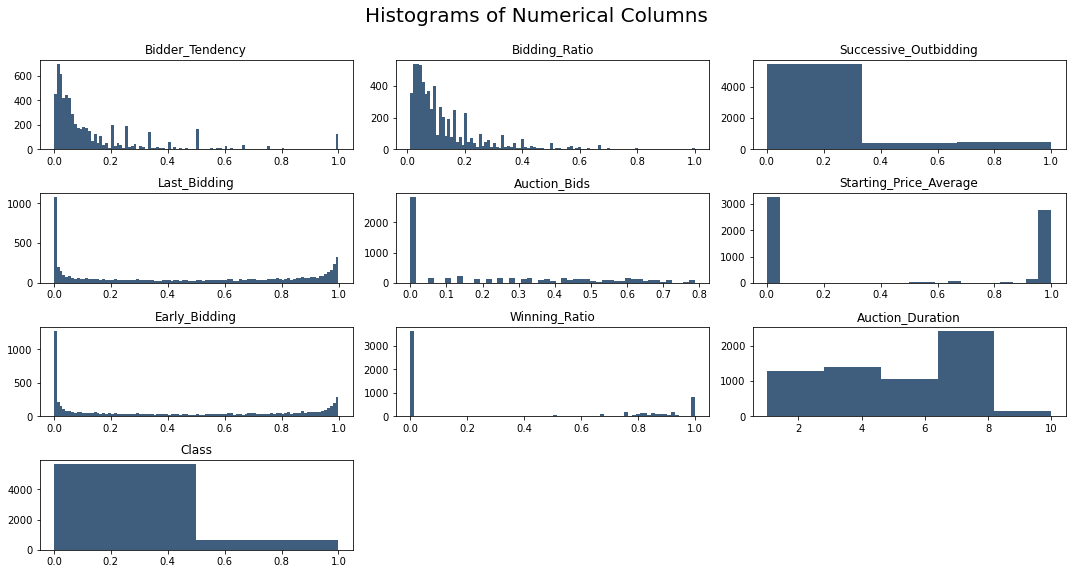

In [11]:
fig = plt.figure(figsize=(15,12))

plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
#Since we want to plot every feature in one single plot, we re going to iterate every feature

for i in range(shill3.shape[1]):
    #This will iterate every feature.Shape gives the dimensions of the dataframe and he first item gives the number of columns
    #and since python does not include all the columns we are adding 1 to it. 
    plt.subplot(6,3,i+1)
    #Here in subplot, we are going to tell python number of images in the plot.'i' is given to tell what we are 
    #working on the moment
    f = plt.gca()
    #gca() command cleans up everything
    f.set_title(shill3.columns.values[i])
    #It will title each feature
    
    vals = np.size(shill3.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    #It will tell python how many bins will be in each feature. [:, i-1 ] will query the entire column
    
    plt.hist(shill3.iloc[:, i], bins = vals, color= '#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

HISTOGRAM

BIDDER TENDENCY: From the histogram we see that most of the people have the value of 0 - 0.2. Between 0.2 - 0.4, we see the next cluster of Bids.

Bidding Ratio : The histogram implies that the majority of people are in the Bidding Ratio of 0 - 0.2 which means in most cases, there is no bidding ratio.

Successive Outbidding: There is a high percentage of people in the 0 category and very less people in the in 1 category which implies that most records show that they do not indulge in successive outbidding.

Last Bidding: A Shill Bidder becomes inactive at the last stage. There is not an evidence of Last Bidding but in the end, the data shows a spike in the number of people in last bidding.

Auction Duration : The data shows that the auction duration is mainly between 1 - 6 for most number of biddings and between 6-8, the number of bidding is the highest.

Class: The histogram suggest in most of the bidding cases(6000), the data is 0 which implies the shill bidding did not take place while the answer is 1 for around less than 1000 cases.

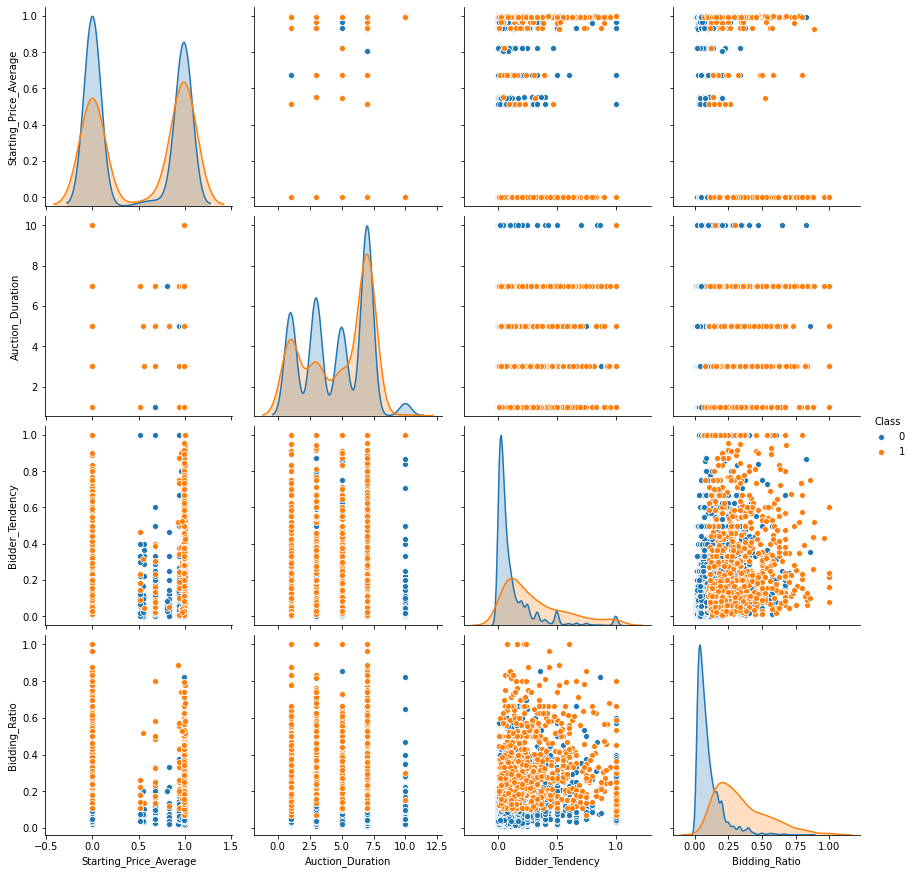

In [12]:
sns.pairplot(shill3, hue='Class',vars = ['Starting_Price_Average','Auction_Duration','Bidder_Tendency','Bidding_Ratio'], height = 3)

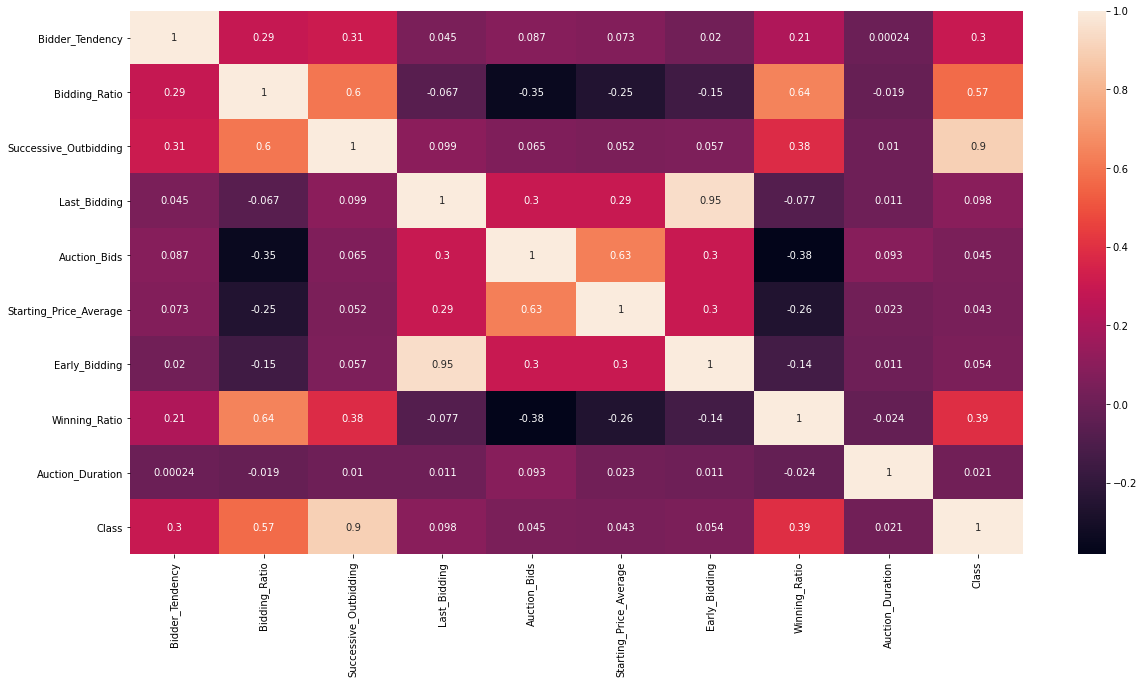

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(shill3.corr(), annot = True)

HEAT MAP

In the heat map, we see a 0.9 correlation between successive bidding and Class.

We also see a 0.95 correlation between Early Bidding and Last Bidding.

In [14]:
shill2 = shill.copy().drop(columns = ['Class','Auction_ID','Bidder_ID','Record_ID'])
shill2.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7


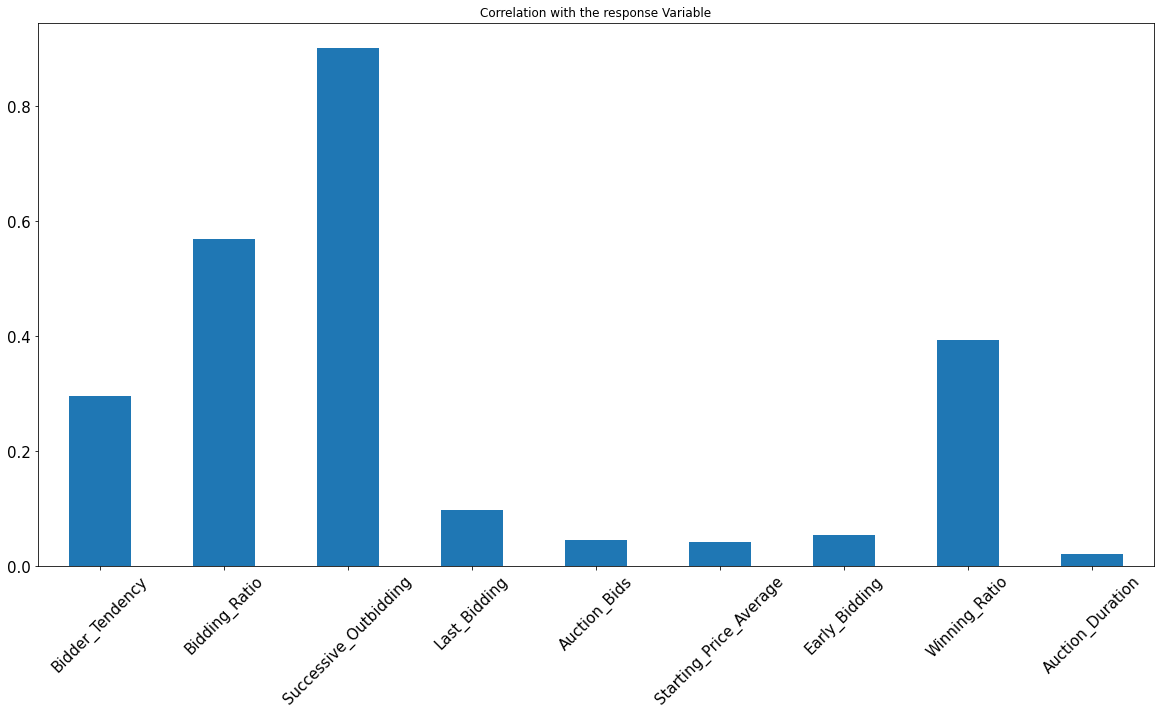

In [15]:
shill2.corrwith(shill.Class).plot.bar(figsize = (20,10),
                                              title = 'Correlation with the response Variable',
                                              fontsize = 15,
                                              rot= 45)

Cor-relation Plot
Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

The co-relation plot for Successive Outbidding and response variable is highest. It suggests that if there is successive outbidding, then the co-relation of outbidding is the highest.

Bidding Tendency, Bidding Ratio, Winning Ratio also have high correlation which show that if their value is high, so is the probability of the Bidder indulging in Shill Bidding.

The correlation of Last Bidding, Auction Bids, Starting Price Average, Early Bidding and Auction Duration has a very low corelation with the response variable. It suggests that these variables have very less infleunce on the response variable.

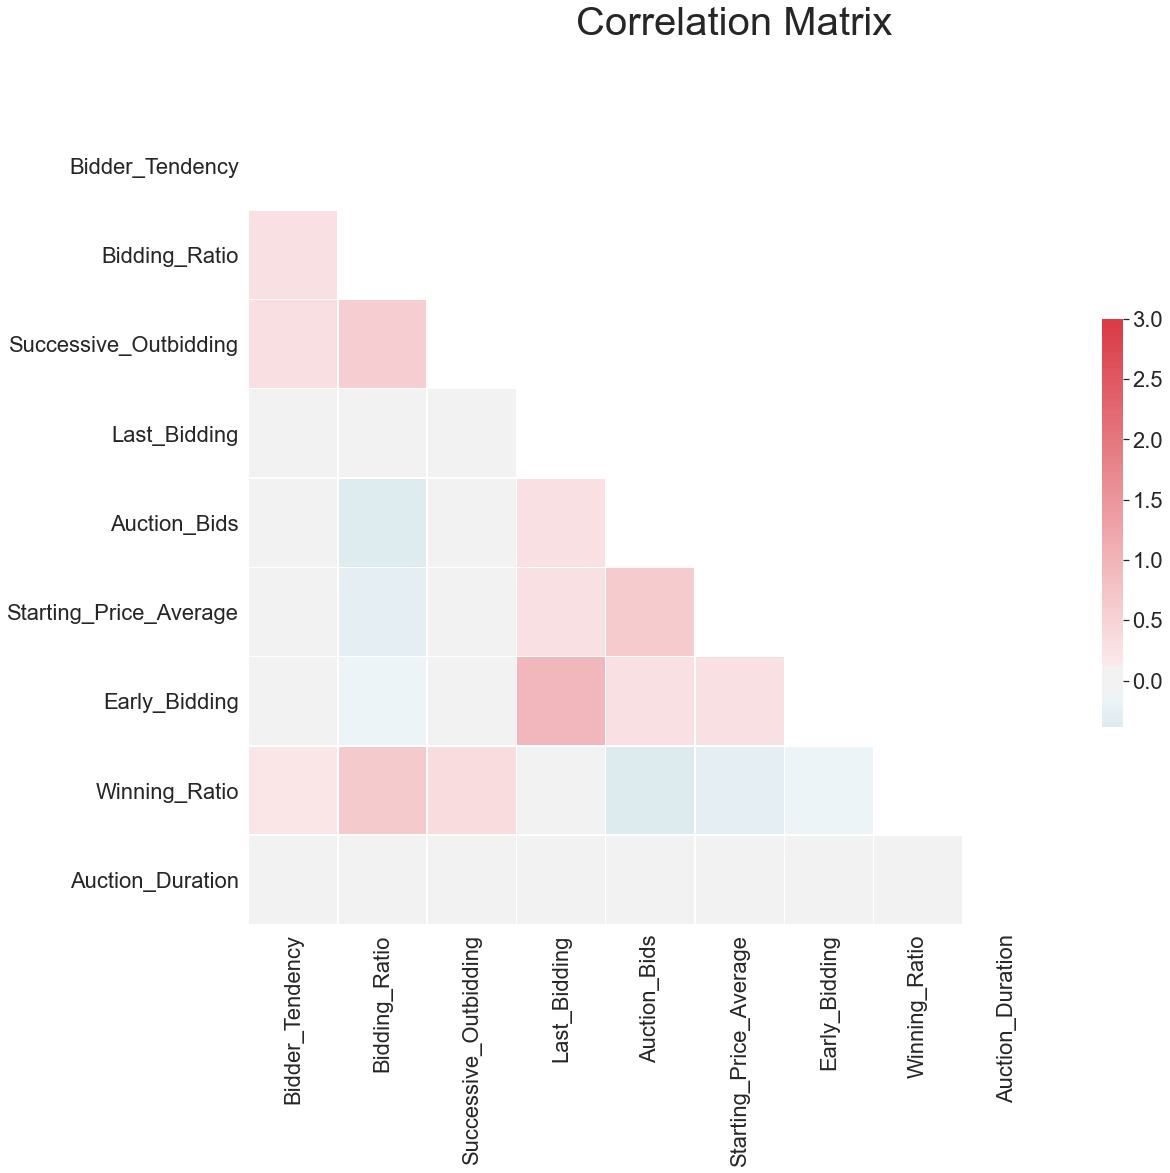

In [16]:
sns.set(style="white", font_scale=2)

corr = shill2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

Positive Correlation:

Bidder Tendency and Bidding Ratio, Successive Outbidding, Winning Ratio have high correlation.

Successive Outbidding and Winning ratio have high correlation.

Last Bidding and Starting Price Average, Early Bidding, and Auction Bids have positive correlation.

Negative Correlation:

Bidding Ratio and Auction Bids, Starting Price Average, Early Bidding have negative correlation

Auction Bids and Winning Ratio have negative corelation.

Starting Price Average and Winning Ratio have negative correlation

**Data Split**

In [17]:
shill = shill.sample(frac=1)
train_shill = shill.iloc[:int(0.7*len(shill))]
test_shill = shill.iloc[int(0.7*len(shill)):]
valid_shill = train_shill[int(0.8*len(train_shill)):]
train_shill = train_shill[:int(0.8*len(train_shill))]

In [18]:
data1 = train_shill
data1_x_bin = ['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']

Target = 'Class'
data1_xy_bin = [Target] + data1_x_bin
data1_xy_bin

['Class',
 'Bidder_Tendency',
 'Bidding_Ratio',
 'Successive_Outbidding',
 'Last_Bidding',
 'Auction_Bids',
 'Starting_Price_Average',
 'Early_Bidding',
 'Winning_Ratio',
 'Auction_Duration']

**Normalizing data**

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_shill[data1_x_bin])
X_train = pd.DataFrame(x_scaled)
X_train.columns = data1_x_bin

x_scaled = min_max_scaler.transform(valid_shill[data1_x_bin])
X_valid = pd.DataFrame(x_scaled)
X_valid.columns = data1_x_bin

x_scaled = min_max_scaler.transform(test_shill[data1_x_bin])
X_test = pd.DataFrame(x_scaled)
X_test.columns = data1_x_bin

y_train = train_shill[Target]
y_valid = valid_shill[Target]
y_test = test_shill[Target]

In [20]:
y_train

3402    0
824     0
1725    0
569     1
3288    0
       ..
4472    0
6151    0
4159    1
4867    0
4830    0
Name: Class, Length: 3539, dtype: int64

In [21]:
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.010417,0.018759,0.0,0.997021,0.576662,0.993657,0.997021,0.000000,0.666667
1,0.050000,0.034091,0.0,0.013637,0.230665,0.993657,0.013637,0.000000,0.666667
2,0.500000,0.094612,0.0,0.941023,0.968185,0.993657,0.940998,1.000000,0.666667
3,0.147059,0.136905,0.5,0.954199,0.597015,0.993657,0.954199,0.923077,0.666667
4,0.043478,0.076087,0.0,0.571184,0.275795,0.000000,0.571184,0.000000,0.444444
...,...,...,...,...,...,...,...,...,...
3534,0.009063,0.086022,0.0,0.222742,0.532017,1.000000,0.222712,0.000000,0.444444
3535,0.157895,0.177827,0.0,0.375438,0.000000,0.000000,0.375411,0.833333,0.666667
3536,0.314286,0.385629,1.0,0.983638,0.453092,0.993657,0.983625,0.866667,0.666667
3537,0.026316,0.007555,0.0,0.841338,0.829506,0.993592,0.841338,0.000000,0.444444


In [22]:
print(f"Training set: {X_train.shape[0]}")
print(f"Validation set: {X_valid.shape[0]}")
print(f"Test set: {X_test.shape[0]}")

Training set: 3539
Validation set: 885
Test set: 1897


In [76]:
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.010417,0.018759,0.0,0.997021,0.576662,0.993657,0.997021,0.000000,0.666667
1,0.050000,0.034091,0.0,0.013637,0.230665,0.993657,0.013637,0.000000,0.666667
2,0.500000,0.094612,0.0,0.941023,0.968185,0.993657,0.940998,1.000000,0.666667
3,0.147059,0.136905,0.5,0.954199,0.597015,0.993657,0.954199,0.923077,0.666667
4,0.043478,0.076087,0.0,0.571184,0.275795,0.000000,0.571184,0.000000,0.444444
...,...,...,...,...,...,...,...,...,...
3534,0.009063,0.086022,0.0,0.222742,0.532017,1.000000,0.222712,0.000000,0.444444
3535,0.157895,0.177827,0.0,0.375438,0.000000,0.000000,0.375411,0.833333,0.666667
3536,0.314286,0.385629,1.0,0.983638,0.453092,0.993657,0.983625,0.866667,0.666667
3537,0.026316,0.007555,0.0,0.841338,0.829506,0.993592,0.841338,0.000000,0.444444


**Principal Component Analysis**

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca.explained_variance_ratio_

array([0.3977366 , 0.22015106])

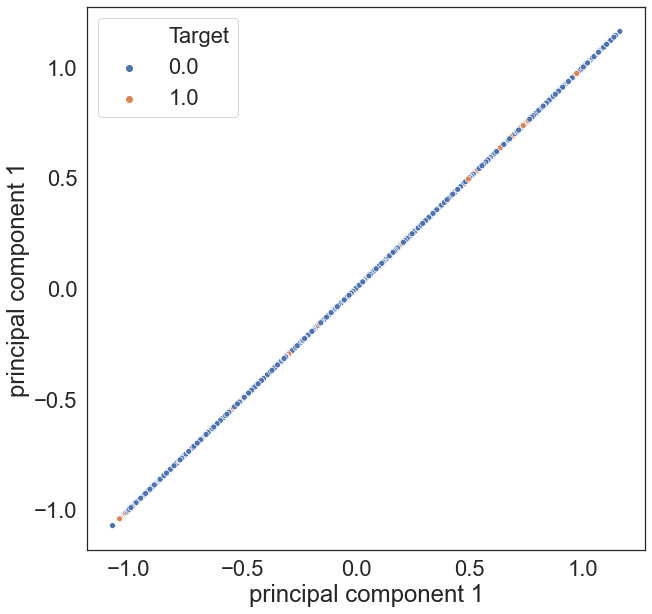

In [24]:
plt.figure(figsize=(10, 10))
principalDf['Target'] = train_shill[Target]
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 1", hue="Target")

From the above plot we can see that there is no linear boundary or hyperplane that can be drawn to split the data points and we observe that nearest neighbors dictate the class of a point and also deep learning can find a decision boundary by transforming the input.

**Logistic Regression**

In [25]:
class LogisticRegression:
    def __init__(self,shape, learningRate=0.0001, tolerance=20, maxIteration = 5000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.w = np.ones(shape, dtype=np.float64) * 0

        
    def add_x0(self, X):
        return np.column_stack([np.ones(X.shape[0], 1), X])
    
    def sigmoid(self, z):
        
        sig = 1 / (1 + np.exp(-z))
        
        return sig
    
    def cost_function(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(sig)) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        
        return cost
    
    def gradient(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad
    
    def gradient_descent(self,X,y):
        
        cost_sequence = []
        
        last_cost = float('inf')
        tolerance_counter = 0
        #self.w = np.ones(X.shape[1], dtype=np.float64) * 0

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X,y)
            current_cost = self.cost_function(X, y)
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            if diff < self.tolerance:
                tolerance_counter += 1
                print('The model stopped - no futher improvement')
#                if tolerance_counter == 10:
                break
        self.plot_cost(cost_sequence)
        return
        
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel='iterations', ylabel='cost', title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc =2, shadow=True)
        plt.show()
    
    def predict(self, X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision
        

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 156.42it/s]
No handles with labels found to put in legend.


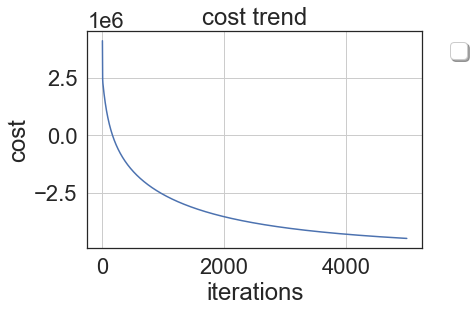

In [26]:
log_reg = LogisticRegression(train_shill[data1_x_bin].shape[1])
log_reg.gradient_descent(train_shill[data1_x_bin], train_shill[Target])

In [27]:
y_hat = log_reg.predict(train_shill[data1_x_bin])
log_train_acc, log_train_rec, log_train_pres = log_reg.evaluate(train_shill[Target], y_hat)
print('Logistic regression accuracy on train data  :  ' + str(log_train_acc))
print('Logistic regression recall on train data  :  ' + str(log_train_rec))
print('Logistic regression precision on train data  :  ' + str(log_train_pres))

Logistic regression accuracy on train data  :  0.9618536309692003
Logistic regression recall on train data  :  0.8091397849462365
Logistic regression precision on train data  :  0.8246575342465754


In [28]:
y_hat = log_reg.predict(test_shill[data1_x_bin])
log_test_acc, log_test_rec, log_test_pres = log_reg.evaluate(test_shill[Target], y_hat)
print('Logistic regression accuracy on test data  :  ' + str(log_test_acc))
print('Logistic regression recall on test data  :  ' + str(log_test_rec))
print('Logistic regression precision on test data  :  ' + str(log_test_pres))

Logistic regression accuracy on test data  :  0.9578281497100686
Logistic regression recall on test data  :  0.7922705314009661
Logistic regression precision on test data  :  0.8159203980099502


# K-nearest Neighbor

In [29]:
def k_nearest_neighbor(X, X_train, Y_train, k):
    [m, n] = X.shape
    [m1, n1] = X_train.shape
    preds = np.zeros((m, 1))
    for i in range(0, m):
        dist = np.subtract(X_train, X[i, :])
        dist = np.linalg.norm(dist, ord=2,  axis=1)
        sort_index = np.argsort(dist)[0:k]
        predictions = Y_train[sort_index]
        preds[i] = stats.mode(predictions).mode[0]
    return preds


def evaluate(y_hat, y):
    y = (y == 1)

    y_hat = (y_hat == 1)

    accuracy = (y == y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()

    return accuracy, recall, precision

k_values = [1, 5, 11, 15, 21]
accuracy_list = []
for j in k_values:
    pred_values = k_nearest_neighbor(np.array(valid_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), j)
    accuracy_list.append((j, evaluate(pred_values.astype(int).squeeze(), np.array(valid_shill[Target].values))))

accuracy_list


[(1, (0.9943502824858758, 0.9479166666666666, 1.0)),
 (5, (0.9954802259887006, 0.9583333333333334, 1.0)),
 (11, (0.9909604519774011, 0.9166666666666666, 1.0)),
 (15, (0.9898305084745763, 0.90625, 1.0)),
 (21, (0.9864406779661017, 0.8854166666666666, 0.9883720930232558))]

In [30]:
test_pred = k_nearest_neighbor(np.array(train_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), 5)
knn_train_acc, knn_train_recall, knn_train_prec = evaluate(test_pred.astype(int).squeeze(), np.array(train_shill[Target].values))
print('KNN accuracy on train data  :  ' + str(knn_train_acc))
print('KNN recall on train data  :  ' + str(knn_train_recall))
print('KNN precision on train data  :  ' + str(knn_train_prec))

KNN accuracy on train data  :  0.9977394744278044
KNN recall on train data  :  0.9865591397849462
KNN precision on train data  :  0.9918918918918919


In [31]:
test_pred = k_nearest_neighbor(np.array(test_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), 5)
knn_test_acc, knn_test_recall, knn_test_prec = evaluate(test_pred.astype(int).squeeze(), np.array(test_shill[Target].values))
print('KNN accuracy on test data  :  ' + str(knn_test_acc))
print('KNN recall on test data  :  ' + str(knn_test_recall))
print('KNN precision on test data  :  ' + str(knn_test_prec))

KNN accuracy on test data  :  0.9978914074855034
KNN recall on test data  :  0.9903381642512077
KNN precision on test data  :  0.9903381642512077


**Deep Neural Network**

In [32]:
model = keras.models.Sequential()
model.add(layers.Dense(11,activation='relu',input_dim=9))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_shill[data1_x_bin],train_shill[Target],epochs=300)


Epoch 1/300
111/111 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.7782
Epoch 2/300
111/111 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8960
Epoch 3/300
111/111 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9356
Epoch 4/300
111/111 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9613
Epoch 5/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9669
Epoch 6/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9729
Epoch 7/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9749
Epoch 8/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9774
Epoch 9/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9780
Epoch 10/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0483 - accura

111/111 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9972
Epoch 82/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9983
Epoch 83/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9977
Epoch 84/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9986
Epoch 85/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 86/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 87/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9983
Epoch 88/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 89/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 90/300
111/111 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 

111/111 [==============================] - 0s 2ms/step - loss: 4.7448e-04 - accuracy: 1.0000
Epoch 239/300
111/111 [==============================] - 0s 2ms/step - loss: 4.5956e-04 - accuracy: 1.0000
Epoch 240/300
111/111 [==============================] - 0s 1ms/step - loss: 4.2228e-04 - accuracy: 1.0000
Epoch 241/300
111/111 [==============================] - 0s 1ms/step - loss: 3.0837e-04 - accuracy: 1.0000
Epoch 242/300
111/111 [==============================] - 0s 2ms/step - loss: 3.3809e-04 - accuracy: 1.0000
Epoch 243/300
111/111 [==============================] - 0s 1ms/step - loss: 4.1769e-04 - accuracy: 1.0000
Epoch 244/300
111/111 [==============================] - 0s 1ms/step - loss: 5.1288e-04 - accuracy: 1.0000
Epoch 245/300
111/111 [==============================] - 0s 1ms/step - loss: 4.8646e-04 - accuracy: 1.0000
Epoch 246/300
111/111 [==============================] - 0s 1ms/step - loss: 3.0210e-04 - accuracy: 1.0000
Epoch 247/300
111/111 [============================

In [35]:
y_pred_prob_1 = model.predict(X_test)
y_pred_1 = y_pred_prob_1.round()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99      1690
         Yes       0.83      1.00      0.91       207

    accuracy                           0.98      1897
   macro avg       0.92      0.99      0.95      1897
weighted avg       0.98      0.98      0.98      1897



In [37]:
Y_pred_nn = model.predict(train_shill[data1_x_bin])
Y_pred_nn[Y_pred_nn >= 0.5] = 1
Y_pred_nn[Y_pred_nn < 0.5] = 0
dnn_train_acc, dnn_train_recall, dnn_train_prec = evaluate(Y_pred_nn.astype(int).squeeze(), np.array(train_shill[Target].values))
print('DNN accuracy on train data  :  ' + str(dnn_train_acc))
print('DNN recall on train data  :  ' + str(dnn_train_recall))
print('DNN precision on train data  :  ' + str(dnn_train_prec))

DNN accuracy on train data  :  1.0
DNN recall on train data  :  1.0
DNN precision on train data  :  1.0


In [38]:
Y_pred_nn = model.predict(test_shill[data1_x_bin])
Y_pred_nn[Y_pred_nn >= 0.5] = 1
Y_pred_nn[Y_pred_nn < 0.5] = 0
dnn_test_acc, dnn_test_recall, dnn_test_prec = evaluate(Y_pred_nn.astype(int).squeeze(), np.array(test_shill[Target].values))
print('DNN accuracy on test data  :  ' + str(dnn_test_acc))
print('DNN recall on test data  :  ' + str(dnn_test_recall))
print('DNN precision on test data  :  ' + str(dnn_test_prec))

DNN accuracy on test data  :  0.9947285187137586
DNN recall on test data  :  0.9806763285024155
DNN precision on test data  :  0.9712918660287081


# Neural Network 1 (Another)

In [39]:
EPOCHS = 100
BATCH_SIZE = 256
def objective(trial):

    model = keras.Sequential()

    in_feat = X_train.shape[0]

    for i in range(trial.suggest_int("n_layers", 1, 2)):
        out_feat = trial.suggest_int("n_units_{}".format(i+1), 1, 40)
        model.add(keras.layers.Dense(units=out_feat, activation='relu'))
        model.add(keras.layers.Dropout(trial.suggest_uniform("dropout_{}".format(i+1), 0.2, 0.5)))
        in_feat=out_feat
 
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(trial.suggest_float("lr", 5e-5, 1e-2, log=True)),
                  metrics=['accuracy'])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    
    model.fit(X_train, y_train,
              validation_data = (X_valid, y_valid),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              callbacks = [early_stop], 
              verbose = False )
    
    score = model.evaluate(X_valid, y_valid, verbose=0)
                  
    return score[1]


In [40]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

params_1 = []

for key, value in trial.params.items():
    params_1.append(value)
    print("    {}: {}".format(key, value))

[I 2022-01-23 22:01:22,769] A new study created in memory with name: no-name-c777e3c7-1005-4f68-a850-5e96db62f8b8
[I 2022-01-23 22:01:24,083] Trial 0 finished with value: 0.8915254473686218 and parameters: {'n_layers': 2, 'n_units_1': 11, 'dropout_1': 0.24324002441160925, 'n_units_2': 19, 'dropout_2': 0.3325623746201183, 'lr': 0.00012156378045110866}. Best is trial 0 with value: 0.8915254473686218.
[I 2022-01-23 22:01:25,385] Trial 1 finished with value: 0.8915254473686218 and parameters: {'n_layers': 1, 'n_units_1': 35, 'dropout_1': 0.4336025865566271, 'lr': 0.0001763904907583424}. Best is trial 0 with value: 0.8915254473686218.
[I 2022-01-23 22:01:26,583] Trial 2 finished with value: 0.8915254473686218 and parameters: {'n_layers': 1, 'n_units_1': 7, 'dropout_1': 0.2581158985796533, 'lr': 0.0028175486670332906}. Best is trial 0 with value: 0.8915254473686218.
[I 2022-01-23 22:01:27,746] Trial 3 finished with value: 0.8915254473686218 and parameters: {'n_layers': 2, 'n_units_1': 37, 'd

[I 2022-01-23 22:02:16,438] Trial 28 finished with value: 0.9830508232116699 and parameters: {'n_layers': 2, 'n_units_1': 20, 'dropout_1': 0.4128284730304693, 'n_units_2': 36, 'dropout_2': 0.4654589174618327, 'lr': 0.009573221369785133}. Best is trial 10 with value: 0.9841808080673218.
[I 2022-01-23 22:02:18,473] Trial 29 finished with value: 0.9819208979606628 and parameters: {'n_layers': 2, 'n_units_1': 32, 'dropout_1': 0.4673436493475811, 'n_units_2': 30, 'dropout_2': 0.4426165493747723, 'lr': 0.003312937468022381}. Best is trial 10 with value: 0.9841808080673218.
[I 2022-01-23 22:02:19,857] Trial 30 finished with value: 0.8915254473686218 and parameters: {'n_layers': 2, 'n_units_1': 29, 'dropout_1': 0.29598651055117176, 'n_units_2': 25, 'dropout_2': 0.364244741674428, 'lr': 0.0012425159300199565}. Best is trial 10 with value: 0.9841808080673218.
[I 2022-01-23 22:02:22,231] Trial 31 finished with value: 0.9830508232116699 and parameters: {'n_layers': 2, 'n_units_1': 26, 'dropout_1':

Number of finished trials: 50
Best trial:
  Value: 0.9853107333183289
    n_layers: 2
    n_units_1: 18
    dropout_1: 0.4926692172767171
    n_units_2: 31
    dropout_2: 0.43438633512265834
    lr: 0.00516018884120667


In [41]:
n_layers_1 = params_1[0]

units_1_1 = params_1[1]
dropout_1_1 = np.round(params_1[2],4)

lr_1 = np.round(params_1[3],8)

In [42]:
model= keras.Sequential()

model.add(keras.layers.Dense(units=units_1_1, activation='relu'))
model.add(keras.layers.Dropout(dropout_1_1))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr_1),
              metrics=['accuracy'])

#early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

model.fit(X_train, y_train,
              validation_data = (X_valid, y_valid),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              #callbacks = [early_stop], 
)


Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 115.5030 - accuracy: 0.7395 - val_loss: 2.3253 - val_accuracy: 0.8915
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 3.0669 - accuracy: 0.8949 - val_loss: 2.4126 - val_accuracy: 0.1085
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9951 - accuracy: 0.8367 - val_loss: 0.5728 - val_accuracy: 0.8915
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8949 - val_loss: 0.3477 - val_accuracy: 0.8915
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5250 - accuracy: 0.8367 - val_loss: 0.3585 - val_accuracy: 0.8915
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8949 - val_loss: 0.3501 - val_accuracy: 0.8915
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3502 - accuracy: 0.8949 - val_loss: 0.3538 - val_accuracy: 0.8915
Epoch 8/10

Epoch 59/100
14/14 [==============================] - 0s 7ms/step - loss: 1.2225 - accuracy: 0.8389 - val_loss: 0.3607 - val_accuracy: 0.8915
Epoch 60/100
14/14 [==============================] - 0s 8ms/step - loss: 0.8870 - accuracy: 0.7869 - val_loss: 1.3628 - val_accuracy: 0.8915
Epoch 61/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6418 - accuracy: 0.8350 - val_loss: 0.3917 - val_accuracy: 0.8915
Epoch 62/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3681 - accuracy: 0.8949 - val_loss: 0.3579 - val_accuracy: 0.8915
Epoch 63/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.8949 - val_loss: 0.4038 - val_accuracy: 0.8915
Epoch 64/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8949 - val_loss: 0.5089 - val_accuracy: 0.8915
Epoch 65/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.7824 - val_loss: 0.8762 - val_accuracy: 0.8915
Epoch 

In [43]:
model.summary()


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 18)                180       
                                                                 
 dropout_92 (Dropout)        (None, 18)                0         
                                                                 
 dense_146 (Dense)           (None, 1)                 19        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [44]:
score = model.evaluate(X_test, y_test, verbose=0)

In [45]:
y_pred_prob_1 = model.predict(X_test)
y_pred_1 = y_pred_prob_1.round()

print(classification_report(y_test, y_pred_1, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.89      1.00      0.94      1690
         Yes       0.00      0.00      0.00       207

    accuracy                           0.89      1897
   macro avg       0.45      0.50      0.47      1897
weighted avg       0.79      0.89      0.84      1897



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We can see a quite different situation in terms of scores between the 'Yes' and 'No' class: F1 score is 94% for class 'No', and much lower 0% for class 'Yes.
Overall, the Neural Network did perform too badly if the dataset is unbalanced.**

In the following, two different techniques will be used to deal with class unbalance: undersampling and oversampling.
**This is a very important step: we can only apply resampling techniques (undersampling, oversampling...) on the training set!** 

I saw on several notebooks that some people apply resampling on the overall dataset and then train test split, but this is wrong. For example, in the case of Oversampling, if we oversample frst the dataset and then split into train and test sets, it is likely that same rows will be present both in train and test sets, compromising the generalization of the algorithm.

In case of undersampling, if we undersample first and then train-test split, it means that the test set will be balanced, which would not be the case considering the problem at hand (unabalanced dataset), and would result in optimistic predictions. That is way it is importatnt to keep the test set unbalanced and apply resampling only on the training set.

**Class balance by Undersampling**

When undersampling, we aim to remove a number of the rows of the majority class (rows where class=0) in order to match the number of rows of the minority class (rows where class=1).

In [46]:
y_train.value_counts()

0    3167
1     372
Name: Class, dtype: int64

This means that we will remove 3183 - 356 = 2827 rows.

In [47]:
seed = 42
rus = RandomUnderSampler(random_state=seed)

In [48]:
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

In [75]:
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.010417,0.018759,0.0,0.997021,0.576662,0.993657,0.997021,0.000000,0.666667
1,0.050000,0.034091,0.0,0.013637,0.230665,0.993657,0.013637,0.000000,0.666667
2,0.500000,0.094612,0.0,0.941023,0.968185,0.993657,0.940998,1.000000,0.666667
3,0.147059,0.136905,0.5,0.954199,0.597015,0.993657,0.954199,0.923077,0.666667
4,0.043478,0.076087,0.0,0.571184,0.275795,0.000000,0.571184,0.000000,0.444444
...,...,...,...,...,...,...,...,...,...
3534,0.009063,0.086022,0.0,0.222742,0.532017,1.000000,0.222712,0.000000,0.444444
3535,0.157895,0.177827,0.0,0.375438,0.000000,0.000000,0.375411,0.833333,0.666667
3536,0.314286,0.385629,1.0,0.983638,0.453092,0.993657,0.983625,0.866667,0.666667
3537,0.026316,0.007555,0.0,0.841338,0.829506,0.993592,0.841338,0.000000,0.444444


In [49]:
y_train_us.value_counts()

1    372
0    372
Name: Class, dtype: int64

Moreover, we further split the training set into a new train and validation dataset. This is done to monitor a metric ( accuracy or recall for example) on the validation set and so prevent overfitting.

In [50]:
from sklearn.model_selection import train_test_split
X_train_us, X_val_us, y_train_us, y_val_us = train_test_split(X_train_us, y_train_us, test_size=0.2, random_state = seed)

# Neural net 2 (Undersampling)

In [51]:
EPOCHS = 100
BATCH_SIZE = 1
def objective(trial):

    model = keras.Sequential()

    in_feat = X_train.shape[0]

    for i in range(trial.suggest_int("n_layers", 1, 2)):
        out_feat = trial.suggest_int("n_units_{}".format(i+1), 1, 40)
        model.add(keras.layers.Dense(units=out_feat, activation='relu'))
        model.add(keras.layers.Dropout(trial.suggest_uniform("dropout_{}".format(i+1), 0.2, 0.5)))
        in_feat=out_feat
 
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(trial.suggest_float("lr", 5e-5, 1e-2, log=True)),
                  metrics=['accuracy'])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    
    model.fit(X_train_us, y_train_us,
              validation_data = (X_val_us, y_val_us),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              callbacks = [early_stop], 
              verbose = False )
    
    score = model.evaluate(X_val_us, y_val_us, verbose=0)
                  
    return score[1]

In [52]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

params_2 = []

for key, value in trial.params.items():
    params_2.append(value)
    print("    {}: {}".format(key, value))

[I 2022-01-23 22:02:59,901] A new study created in memory with name: no-name-773b123b-b4e2-4e06-a0ba-16e2f0656be3
[I 2022-01-23 22:03:06,483] Trial 0 finished with value: 0.9932885766029358 and parameters: {'n_layers': 2, 'n_units_1': 15, 'dropout_1': 0.21361908706044883, 'n_units_2': 23, 'dropout_2': 0.3363600504598355, 'lr': 0.0052930528646622866}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:03:12,592] Trial 1 finished with value: 0.9932885766029358 and parameters: {'n_layers': 2, 'n_units_1': 18, 'dropout_1': 0.3687501582984066, 'n_units_2': 5, 'dropout_2': 0.4127438867921526, 'lr': 0.0020576095076189228}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:03:17,659] Trial 2 finished with value: 0.9932885766029358 and parameters: {'n_layers': 2, 'n_units_1': 23, 'dropout_1': 0.4042213410380423, 'n_units_2': 24, 'dropout_2': 0.37655330893193184, 'lr': 0.00395801196611455}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:03:25,868] T

[I 2022-01-23 22:07:13,514] Trial 30 finished with value: 0.9932885766029358 and parameters: {'n_layers': 1, 'n_units_1': 34, 'dropout_1': 0.2330394292461567, 'lr': 0.0029198979215506824}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:07:18,388] Trial 31 finished with value: 0.9932885766029358 and parameters: {'n_layers': 1, 'n_units_1': 36, 'dropout_1': 0.28353461132437385, 'lr': 0.0027937553741096167}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:07:34,845] Trial 32 finished with value: 0.9932885766029358 and parameters: {'n_layers': 1, 'n_units_1': 31, 'dropout_1': 0.3199429278572875, 'lr': 0.0001084086154733604}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:07:42,149] Trial 33 finished with value: 0.9932885766029358 and parameters: {'n_layers': 1, 'n_units_1': 32, 'dropout_1': 0.3538885410333848, 'lr': 0.000477670176107965}. Best is trial 0 with value: 0.9932885766029358.
[I 2022-01-23 22:07:47,041] Trial 34 finished with v

Number of finished trials: 50
Best trial:
  Value: 0.9932885766029358
    n_layers: 2
    n_units_1: 15
    dropout_1: 0.21361908706044883
    n_units_2: 23
    dropout_2: 0.3363600504598355
    lr: 0.0052930528646622866


In [53]:
 n_layers_2 = params_2[0]

units_1_2 = params_2[1]
dropout_1_2 = np.round(params_2[2],4)

units_2_2 = params_2[3]
dropout_2_2 = np.round(params_2[4],4)


lr_2 = np.round(params_2[5],8)

In [54]:
model= keras.Sequential()

model.add(keras.layers.Dense(units=units_1_2, activation='relu'))
model.add(keras.layers.Dropout(dropout_1_2))

model.add(keras.layers.Dense(units=units_2_2, activation='relu'))
model.add(keras.layers.Dropout(dropout_2_2))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr_2),
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

model.fit(X_train_us, y_train_us,
              validation_data = (X_val_us, y_val_us),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS
              #callbacks = [early_stop], 
)

Epoch 1/100
595/595 [==============================] - 2s 2ms/step - loss: 0.2136 - accuracy: 0.9143 - val_loss: 0.0482 - val_accuracy: 0.9866
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9782 - val_loss: 0.0718 - val_accuracy: 0.9933
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0543 - val_accuracy: 0.9866
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9782 - val_loss: 0.0656 - val_accuracy: 0.9866
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0927 - val_accuracy: 0.9866
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9882 - val_loss: 0.0893 - val_accuracy: 0.9866
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9866 - val_loss: 0.0864 - val_accuracy: 0.9866

Epoch 58/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9899 - val_loss: 0.3189 - val_accuracy: 0.9933
Epoch 59/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.2850 - val_accuracy: 0.9933
Epoch 60/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.9916 - val_loss: 0.3952 - val_accuracy: 0.9933
Epoch 61/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.3281 - val_accuracy: 0.9933
Epoch 62/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9899 - val_loss: 0.1318 - val_accuracy: 0.9933
Epoch 63/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0173 - accuracy: 0.9933 - val_loss: 0.1658 - val_accuracy: 0.9933
Epoch 64/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.2595 - val_accuracy:

In [55]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_264 (Dense)           (1, 15)                   150       
                                                                 
 dropout_160 (Dropout)       (1, 15)                   0         
                                                                 
 dense_265 (Dense)           (1, 23)                   368       
                                                                 
 dropout_161 (Dropout)       (1, 23)                   0         
                                                                 
 dense_266 (Dense)           (1, 1)                    24        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________


In [56]:
score = model.evaluate(X_test, y_test, verbose=0)  
score

[0.18570852279663086, 0.9783869385719299]

In [57]:
y_pred_prob_2 = model.predict(X_test)
y_pred_2 = y_pred_prob_2.round()

print(classification_report(y_test, y_pred_2, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99      1690
         Yes       0.84      1.00      0.91       207

    accuracy                           0.98      1897
   macro avg       0.92      0.99      0.95      1897
weighted avg       0.98      0.98      0.98      1897



*problem*

We can see a good precision score of 0.86 and quite higher recall equal to 1 for Target = 1.

Higher precision means **lower false positive** and higher recall means **lower false negative** which is necessary for detecting fraud successfully.

By using this model, most of the users would see their fraudolent transactions labeled as fraudolent.

# Class balance by oversampling with SMOTE

Now, oversampling will be performed on the training data.

In [58]:
y_train.value_counts()
#res = 3183 - 356
#res

0    3167
1     372
Name: Class, dtype: int64

This means that we will add 3183 - 356 = 2827 rows with 'Class' = 1, which is indeed a large number of duplicates that will be added.

In [59]:
smote = SMOTE(random_state=seed)

X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

y_train_os.value_counts()

1    3167
0    3167
Name: Class, dtype: int64

The training data now is balanced.

In [60]:
X_train_os, X_val_os, y_train_os, y_val_os = train_test_split(X_train_os, y_train_os, stratify=y_train_os, test_size=0.2, random_state = seed)

# Neural net 3 (Oversampling)

In [61]:
EPOCHS = 100
BATCH_SIZE = 1024
def objective(trial):

    model = keras.Sequential()

    in_feat = X_train.shape[0]

    for i in range(trial.suggest_int("n_layers", 1, 3)):
        out_feat = trial.suggest_int("n_units_{}".format(i+1), 1, 30)
        model.add(keras.layers.Dense(units=out_feat, activation='relu'))
        model.add(keras.layers.Dropout(trial.suggest_uniform("dropout_{}".format(i+1), 0.2, 0.5)))
        in_feat=out_feat
 
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(trial.suggest_float("lr", 5e-5, 1e-2, log=True)),
                  metrics=['accuracy'])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    
    model.fit(X_train_os, y_train_os,
              validation_data = (X_val_os, y_val_os),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              callbacks = [early_stop], 
              verbose = False )
    
    score = model.evaluate(X_val_os, y_val_os, verbose=0)
                  
    return score[1]

In [62]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

params_3 = []

for key, value in trial.params.items():
    params_3.append(value)
    print("    {}: {}".format(key, value))

[I 2022-01-23 22:11:38,452] A new study created in memory with name: no-name-dcec5e8f-a391-42a3-b6fd-4da5837f51f8
[I 2022-01-23 22:11:39,661] Trial 0 finished with value: 0.3504340946674347 and parameters: {'n_layers': 2, 'n_units_1': 3, 'dropout_1': 0.35808509997266713, 'n_units_2': 6, 'dropout_2': 0.4460017599211676, 'lr': 9.478123906034235e-05}. Best is trial 0 with value: 0.3504340946674347.
[I 2022-01-23 22:11:42,657] Trial 1 finished with value: 0.9928966164588928 and parameters: {'n_layers': 2, 'n_units_1': 23, 'dropout_1': 0.41728830687734697, 'n_units_2': 20, 'dropout_2': 0.20991864713698216, 'lr': 0.0005651099117875446}. Best is trial 1 with value: 0.9928966164588928.
[I 2022-01-23 22:11:44,029] Trial 2 finished with value: 0.9936859011650085 and parameters: {'n_layers': 1, 'n_units_1': 25, 'dropout_1': 0.35216291657164434, 'lr': 0.007139281949816415}. Best is trial 2 with value: 0.9936859011650085.
[I 2022-01-23 22:11:47,076] Trial 3 finished with value: 0.8413575291633606 a

[I 2022-01-23 22:12:47,920] Trial 27 finished with value: 0.9944751262664795 and parameters: {'n_layers': 3, 'n_units_1': 12, 'dropout_1': 0.32688161188788817, 'n_units_2': 16, 'dropout_2': 0.3552877463370632, 'n_units_3': 11, 'dropout_3': 0.20358082843458267, 'lr': 0.004067449538512718}. Best is trial 27 with value: 0.9944751262664795.
[I 2022-01-23 22:12:50,507] Trial 28 finished with value: 0.9936859011650085 and parameters: {'n_layers': 3, 'n_units_1': 1, 'dropout_1': 0.31745379723536166, 'n_units_2': 17, 'dropout_2': 0.3155067208749361, 'n_units_3': 8, 'dropout_3': 0.20690519960204523, 'lr': 0.0037247627989609425}. Best is trial 27 with value: 0.9944751262664795.
[I 2022-01-23 22:12:54,300] Trial 29 finished with value: 0.9921073317527771 and parameters: {'n_layers': 2, 'n_units_1': 1, 'dropout_1': 0.32654709346171185, 'n_units_2': 18, 'dropout_2': 0.3266503196875662, 'lr': 0.006698582752844478}. Best is trial 27 with value: 0.9944751262664795.
[I 2022-01-23 22:12:58,324] Trial 30

Number of finished trials: 50
Best trial:
  Value: 0.9944751262664795
    n_layers: 3
    n_units_1: 12
    dropout_1: 0.32688161188788817
    n_units_2: 16
    dropout_2: 0.3552877463370632
    n_units_3: 11
    dropout_3: 0.20358082843458267
    lr: 0.004067449538512718


In [63]:
#problem

n_layers_3 = params_3[0]

units_1_3 = params_3[1]
dropout_1_3 = np.round(params_3[2],4)

units_2_3 = params_3[3]
dropout_2_3 = np.round(params_3[4],4)


lr_3 = np.round(params_3[5],8)

In [64]:
model= keras.Sequential()

model.add(keras.layers.Dense(units=units_1_3, activation='relu'))
model.add(keras.layers.Dropout(dropout_1_3))

model.add(keras.layers.Dense(units=units_2_3, activation='relu'))
model.add(keras.layers.Dropout(dropout_2_3))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr_3),
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

model.fit(X_train_os, y_train_os,
              validation_data = (X_val_os, y_val_os),
              shuffle = True,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS
              #callbacks = [early_stop], 
)

Epoch 1/100
5/5 [==============================] - 1s 47ms/step - loss: 15360.5332 - accuracy: 0.5183 - val_loss: 21.9679 - val_accuracy: 0.4972
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 14.1621 - accuracy: 0.5023 - val_loss: 7.3037 - val_accuracy: 0.5004
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 4.0462 - accuracy: 0.4946 - val_loss: 5.5453 - val_accuracy: 0.4996
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 4.6804 - accuracy: 0.5001 - val_loss: 0.7572 - val_accuracy: 0.4996
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 2.5348 - accuracy: 0.5007 - val_loss: 2.5871 - val_accuracy: 0.5004
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 1.6920 - accuracy: 0.5100 - val_loss: 2.1923 - val_accuracy: 0.4996
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 1.4362 - accuracy: 0.5054 - val_loss: 1.6836 - val_accuracy: 0.5004
Epoch 8/100
5/5

In [65]:
model.summary()

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_436 (Dense)           (None, 12)                120       
                                                                 
 dropout_281 (Dropout)       (None, 12)                0         
                                                                 
 dense_437 (Dense)           (None, 16)                208       
                                                                 
 dropout_282 (Dropout)       (None, 16)                0         
                                                                 
 dense_438 (Dense)           (None, 1)                 17        
                                                                 
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [66]:
score = model.evaluate(X_test, y_test, verbose=0)  

In [67]:
y_pred_prob_3 = model.predict(X_test)
y_pred_3 = y_pred_prob_3.round()

In [68]:
print(classification_report(y_test, y_pred_3, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.89      1.00      0.94      1690
         Yes       0.00      0.00      0.00       207

    accuracy                           0.89      1897
   macro avg       0.45      0.50      0.47      1897
weighted avg       0.79      0.89      0.84      1897



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results Comparison

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score, auc

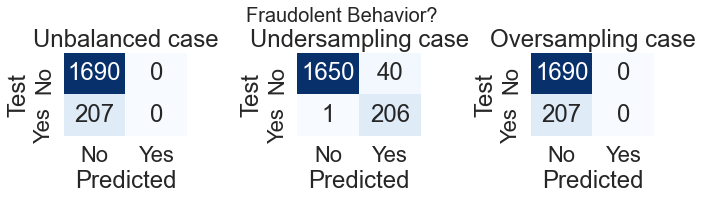

In [70]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
labels=['No','Yes']

sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, cmap="Blues", fmt='g', cbar=False,ax=ax[0])
plt.suptitle('Fraudolent Transaction?', fontsize=20)
ax[0].set_title('Unbalanced case')
ax[0].set_yticklabels(labels);
ax[0].set_xticklabels(labels);
ax[0].set_ylabel('Test')
ax[0].set_xlabel('Predicted')

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap="Blues", fmt='g', cbar=False,ax=ax[1])
plt.suptitle('Fraudolent Behavior?', fontsize=20)
ax[1].set_title('Undersampling case')
ax[1].set_yticklabels(labels);
ax[1].set_xticklabels(labels);
ax[1].set_ylabel('Test')
ax[1].set_xlabel('Predicted')


sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[2])
ax[2].set_title('Oversampling case')
ax[2].set_xticklabels(labels);
ax[2].set_yticklabels(labels);
ax[2].set_ylabel('Test')
ax[2].set_xlabel('Predicted')
plt.tight_layout()

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


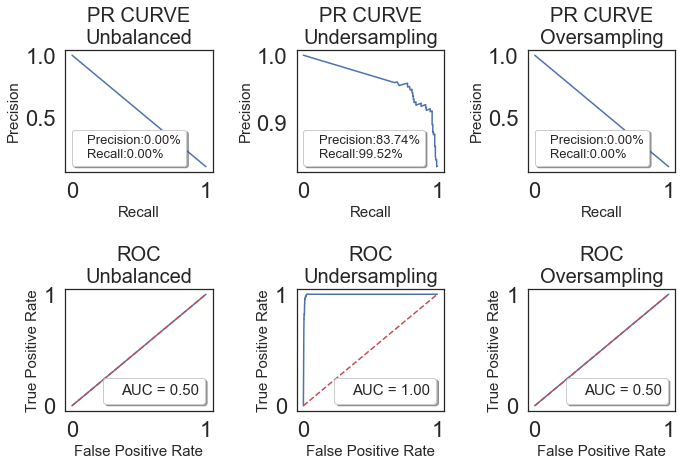

In [71]:
fig, ax = plt.subplots(2,3,figsize=(10,7))

####PR CURVES####

p,r,_ = precision_recall_curve(y_test,y_pred_prob_1)
ax[0,0].plot(r,p, label = "Precision:{:.2f}%\nRecall:{:.2f}%".format(precision_score(y_test, y_pred_1)*100,recall_score(y_test, y_pred_1)*100))
ax[0,0].set_title('PR CURVE\nUnbalanced',fontsize=20)
ax[0,0].set_ylabel('Precision',fontsize=15)
ax[0,0].set_xlabel('Recall',fontsize=15)
ax[0,0].legend(loc = 'lower left', fontsize=13, fancybox=True, shadow=True, frameon=True,handlelength=0)

p,r,_ = precision_recall_curve(y_test,y_pred_prob_2)
ax[0,1].plot(r,p, label = "Precision:{:.2f}%\nRecall:{:.2f}%".format(precision_score(y_test, y_pred_2)*100,recall_score(y_test, y_pred_2)*100))
ax[0,1].set_title('PR CURVE\nUndersampling',fontsize=20)
ax[0,1].set_ylabel('Precision',fontsize=15)
ax[0,1].set_xlabel('Recall',fontsize=15)
ax[0,1].legend(loc = 'lower left', fontsize=13, fancybox=True, shadow=True, frameon=True,handlelength=0)

p,r,_ = precision_recall_curve(y_test,y_pred_prob_3)
ax[0,2].plot(r,p, label = "Precision:{:.2f}%\nRecall:{:.2f}%".format(precision_score(y_test, y_pred_3)*100,recall_score(y_test, y_pred_3)*100))
ax[0,2].set_title('PR CURVE\nOversampling',fontsize=20)
ax[0,2].set_ylabel('Precision',fontsize=15)
ax[0,2].set_xlabel('Recall',fontsize=15)
ax[0,2].legend(loc = 'lower left', fontsize=13, fancybox=True, shadow=True, frameon=True,handlelength=0)

####ROC####


fprcat, tprcat, _ = roc_curve(y_test, y_pred_prob_1)
roc_auccat = auc(fprcat, tprcat)
ax[1,0].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax[1,0].plot([0, 1], [0, 1],'r--')
ax[1,0].set_title('ROC\nUnbalanced',fontsize=20)
ax[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax[1,0].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)

fprcat, tprcat, _ = roc_curve(y_test, y_pred_prob_2)
roc_auccat = auc(fprcat, tprcat)
ax[1,1].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax[1,1].plot([0, 1], [0, 1],'r--')
ax[1,1].set_title('ROC\nUndersampling',fontsize=20)
ax[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax[1,1].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)


fprcat, tprcat, _ = roc_curve(y_test, y_pred_prob_3)
roc_auccat = auc(fprcat, tprcat)
ax[1,2].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax[1,2].plot([0, 1], [0, 1],'r--')
ax[1,2].set_title('ROC\nOversampling',fontsize=20)
ax[1,2].set_ylabel('True Positive Rate',fontsize=15)
ax[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax[1,2].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)


plt.tight_layout()
plt.show()
